<a href="https://colab.research.google.com/github/wtfoong/ODL_assignment/blob/main/ODL_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install new ver of panda profilling
!pip install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 328 kB 5.2 MB/s 
     |████████████████████████████████| 102 kB 48.8 MB/s 
     |████████████████████████████████| 679 kB 43.2 MB/s 
     |████████████████████████████████| 9.9 MB 48.4 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 4.7 MB 42.0 MB/s 
     |████████████████████████████████| 296 kB 63.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=fcc3c5850ee11827384375e0a66bc51663a74cdc464b33ebd4a8c8a9667c36ae
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

In [ ]:
#imports
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import math
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Dataset Exploration and preprocessing

In [ ]:
#Mounting Google Drive to google Colab
from google.colab import drive
drive.mount('/drive')

In [ ]:
#connecting dataset
path = '/drive/MyDrive/ODL assignment/diabetes_binary_health_indicators_BRFSS2015.csv' 
df = pd.read_csv(path)

In [ ]:
#read first 5 row of data
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
#read last 5 rows 
df.tail()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[5 rows x 22 columns]

In [ ]:
#see all columns
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
#see dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
#know number of rows and columns
df.shape

(253680, 22)

In [ ]:
#get mean and other stuff of all columns
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [ ]:
#get a detailed report for all columsn in the dataset
pReport = ProfileReport(df)
pReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#check for missing data
df.isnull().sum().any()

False

In [ ]:
# view unique values in all columns
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

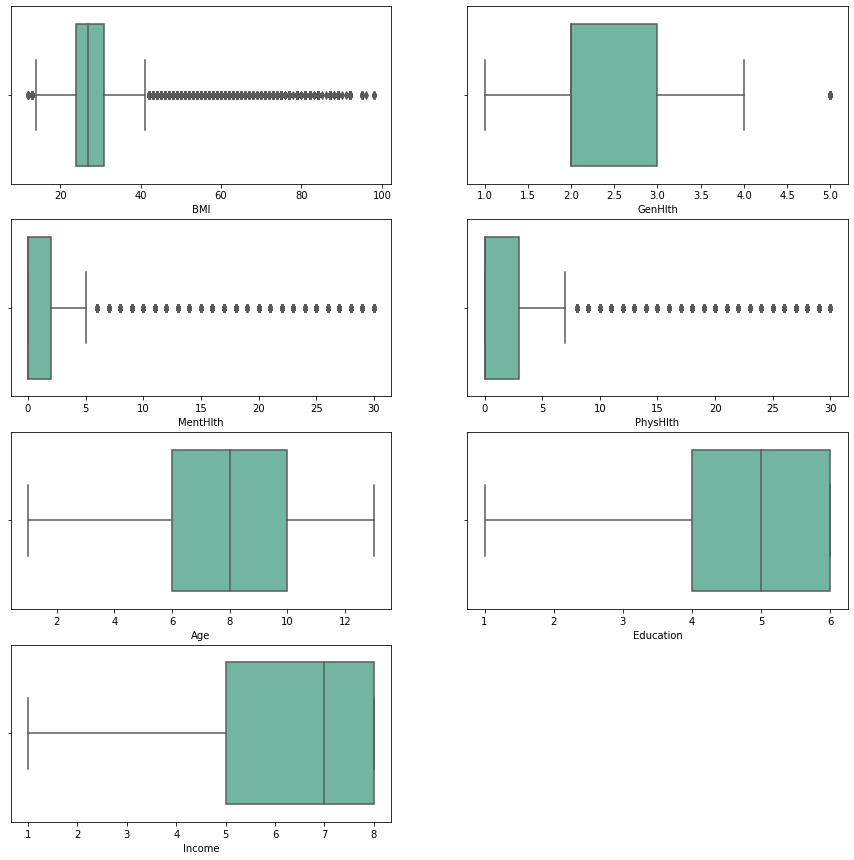

In [ ]:
# chk for outliers in dataset using box plot, columns chosen to check are columns with more than 2 unique values
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

In [ ]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic in a new Diabetes_str column
df["Diabetes_str"]= df["Diabetes_binary"].replace({'0':"Not Diabetic",'1':"Diabetic"})

In [ ]:
# to show categorical values better
df2 = df.copy() 

In [ ]:
# help to show relations between the different features better, all explaination for columns are from author of dataset
df2.Age[df2['Age'] == 1] = '18 - 24'
df2.Age[df2['Age'] == 2] = '25 - 29'
df2.Age[df2['Age'] == 3] = '30 - 34'
df2.Age[df2['Age'] == 4] = '35 - 39'
df2.Age[df2['Age'] == 5] = '40 - 44'
df2.Age[df2['Age'] == 6] = '45 - 49'
df2.Age[df2['Age'] == 7] = '50 - 54'
df2.Age[df2['Age'] == 8] = '55 - 59'
df2.Age[df2['Age'] == 9] = '60 - 64'
df2.Age[df2['Age'] == 10] = '65 - 69'
df2.Age[df2['Age'] == 11] = '70 - 74'
df2.Age[df2['Age'] == 12] = '75 - 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2.Diabetes_binary[df2['Diabetes_binary'] == 0] = 'Not Diabetic'
df2.Diabetes_binary[df2['Diabetes_binary'] == 1] = 'Diabetic'

df2.HighBP[df2['HighBP'] == 0] = 'Normal BP'
df2.HighBP[df2['HighBP'] == 1] = 'High BP'

df2.HighChol[df2['HighChol'] == 0] = 'Normal Cholesterol'
df2.HighChol[df2['HighChol'] == 1] = 'High Cholesterol'

df2.CholCheck[df2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df2.CholCheck[df2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df2.Smoker[df2['Smoker'] == 0] = 'No'
df2.Smoker[df2['Smoker'] == 1] = 'Yes'

df2.Stroke[df2['Stroke'] == 0] = 'No'
df2.Stroke[df2['Stroke'] == 1] = 'Yes'

df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 0] = 'No'
df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 1] = 'Yes'

df2.PhysActivity[df2['PhysActivity'] == 0] = 'No'
df2.PhysActivity[df2['PhysActivity'] == 1] = 'Yes'

df2.Fruits[df2['Fruits'] == 0] = 'No'
df2.Fruits[df2['Fruits'] == 1] = 'Yes'

df2.Veggies[df2['Veggies'] == 0] = 'No'
df2.Veggies[df2['Veggies'] == 1] = 'Yes'

df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 0] = 'No'
df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 1] = 'Yes'

df2.AnyHealthcare[df2['AnyHealthcare'] == 0] = 'No'
df2.AnyHealthcare[df2['AnyHealthcare'] == 1] = 'Yes'

df2.NoDocbcCost[df2['NoDocbcCost'] == 0] = 'No'
df2.NoDocbcCost[df2['NoDocbcCost'] == 1] = 'Yes'

df2.GenHlth[df2['GenHlth'] == 5] = 'Excellent'
df2.GenHlth[df2['GenHlth'] == 4] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 1] = 'Poor'

df2.DiffWalk[df2['DiffWalk'] == 0] = 'No'
df2.DiffWalk[df2['DiffWalk'] == 1] = 'Yes'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Education[df2['Education'] == 1] = 'Never Attended School'
df2.Education[df2['Education'] == 2] = 'Elementary'
df2.Education[df2['Education'] == 3] = 'Junior High School'
df2.Education[df2['Education'] == 4] = 'Senior High School'
df2.Education[df2['Education'] == 5] = 'Undergraduate Degree'
df2.Education[df2['Education'] == 6] = 'Magister'

df2.Income[df2['Income'] == 1] = 'Less Than $10,000'
df2.Income[df2['Income'] == 2] = 'Less Than $10,000'
df2.Income[df2['Income'] == 3] = 'Less Than $10,000'
df2.Income[df2['Income'] == 4] = 'Less Than $10,000'
df2.Income[df2['Income'] == 5] = 'Less Than $35,000'
df2.Income[df2['Income'] == 6] = 'Less Than $35,000'
df2.Income[df2['Income'] == 7] = 'Less Than $35,000'
df2.Income[df2['Income'] == 8] = '$75,000 or More'

Text(0.5, 1.0, 'correlation of features')

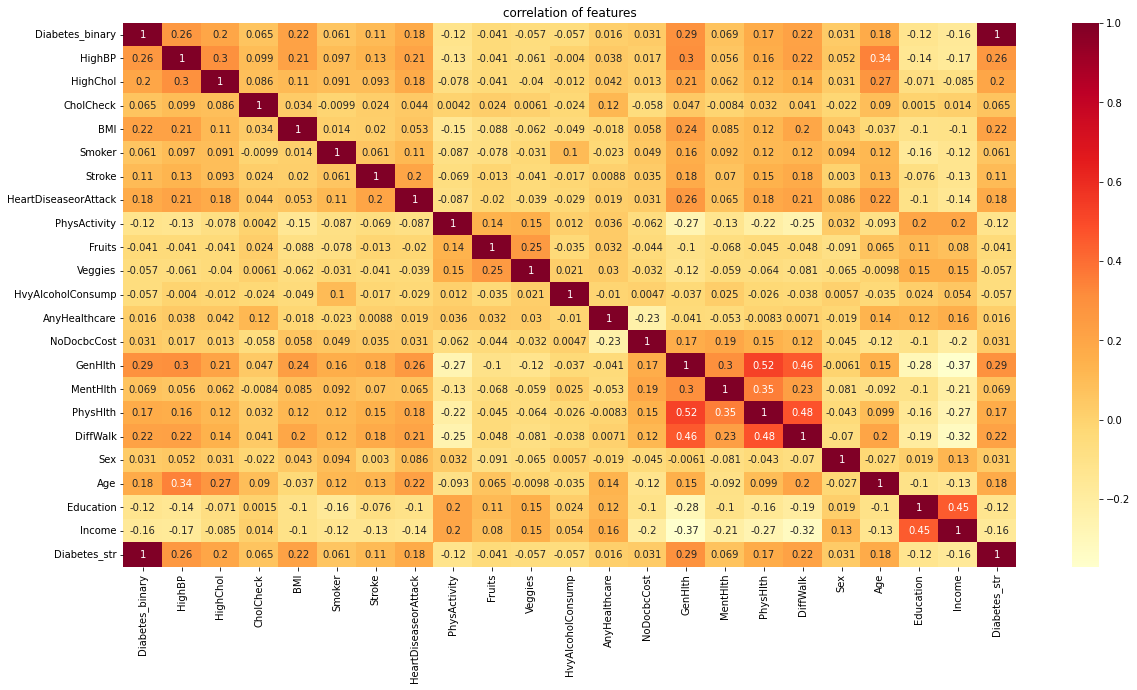

In [ ]:
#use heatmap to show correlation of features in the dataset
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of features")

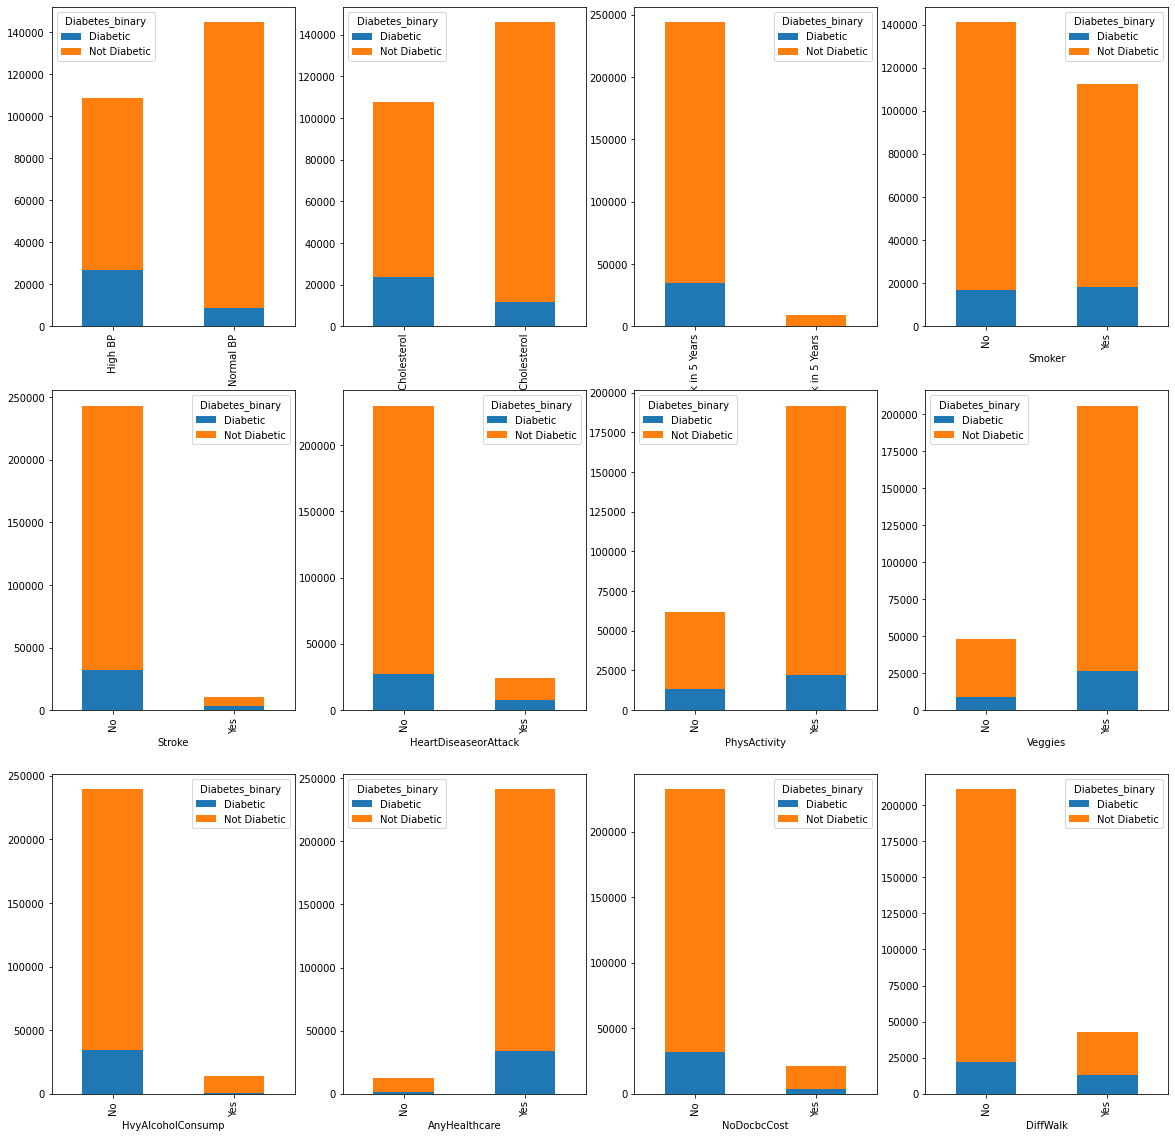

In [ ]:
# using bar graph to show the relation of the features with the Diabetic binary along with the feature's yes no columns
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_pivot_plot(df2, x_column):
    # Create a pivot table for satisfaction versus another rating for easy plotting.
    p_plot = df2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return p_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_pivot_plot(df2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()



---



In [ ]:
#explore on Diabetes_binary column

df2["Diabetes_binary"].value_counts()

Not Diabetic    218334
Diabetic         35346
Name: Diabetes_binary, dtype: int64

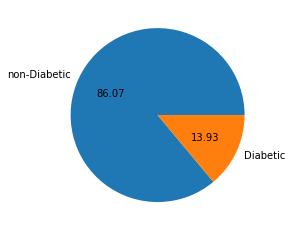

In [ ]:
#showing the numbers in a pie chart

labels=["non-Diabetic","Diabetic"]

plt.pie(df2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

The pie chart shows that there are more non diabetic people than diabetic patients.



---



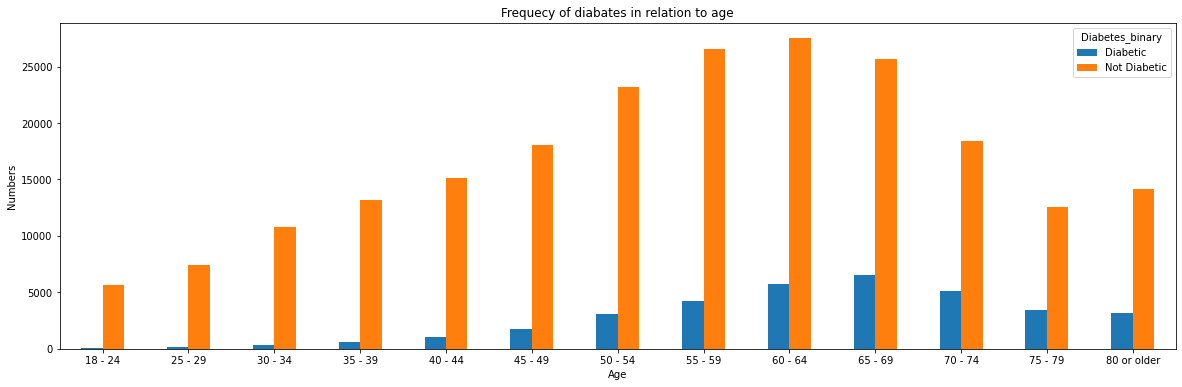

In [ ]:
#Age relation with diabetes binary
pd.crosstab(df2.Age,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to age')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

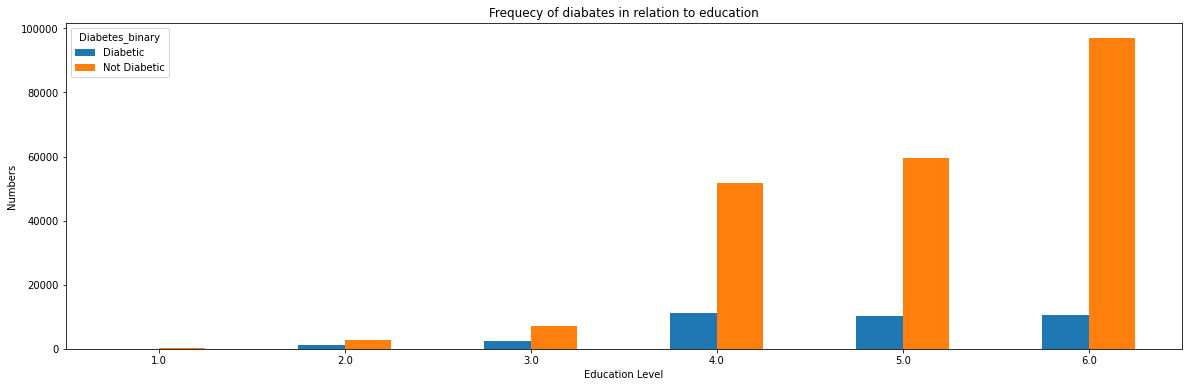

In [ ]:
#relation of education with diabetes
pd.crosstab(df.Education,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to education')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

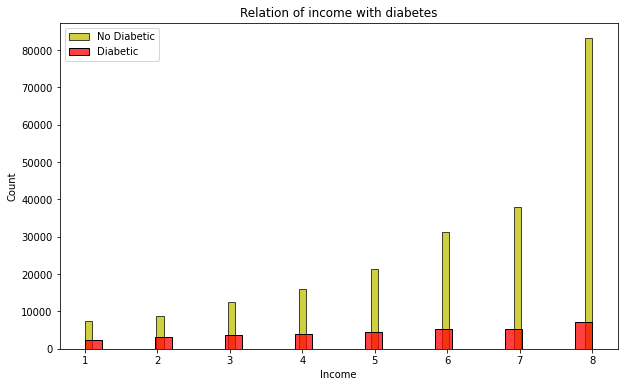

In [ ]:
#relation of income with diabetes
plt.figure(figsize=(10,6))


sns.histplot(df.Income[df.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.histplot(df.Income[df.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation of income with diabetes")

plt.legend()

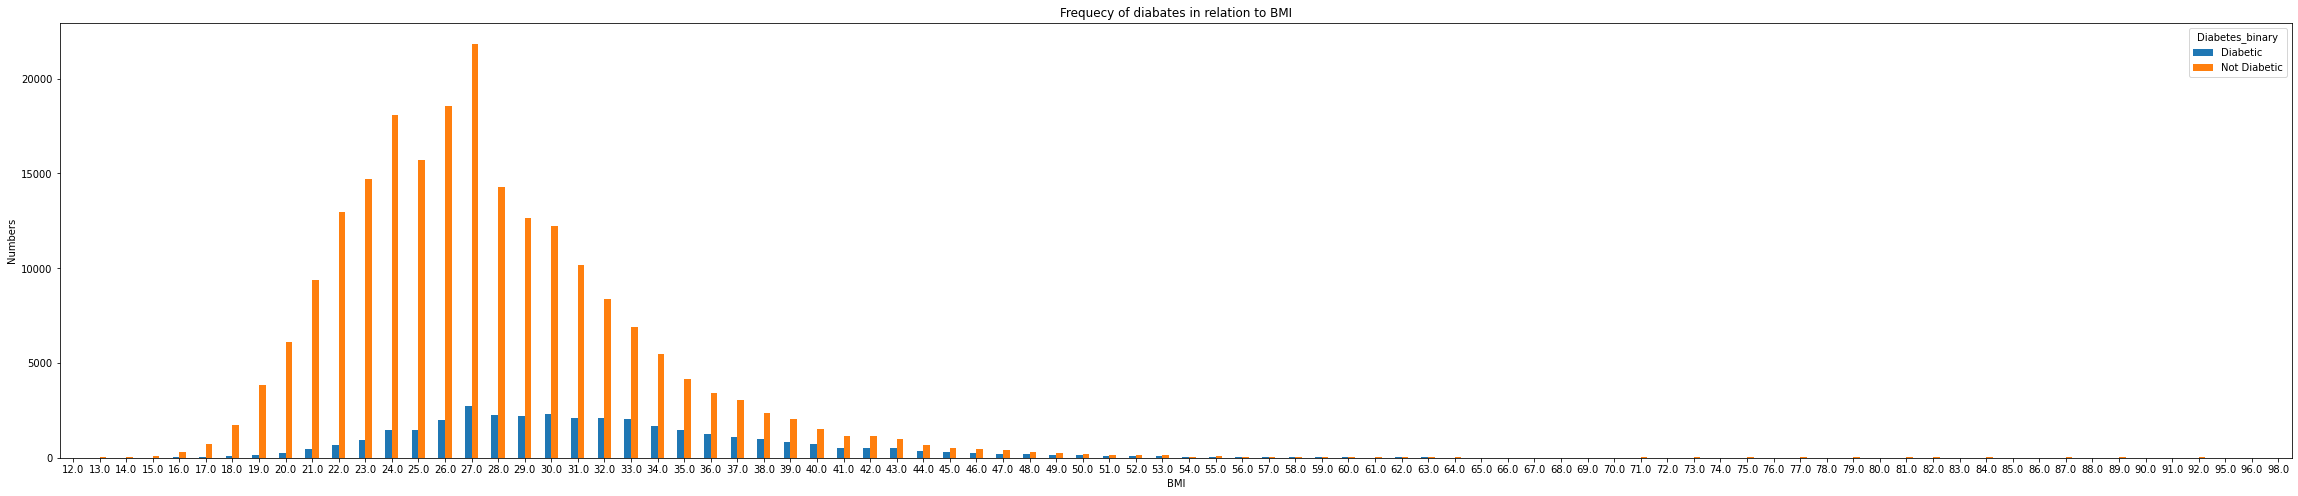

In [ ]:
#see the relation of  BMI and diabetes
pd.crosstab(df2.BMI,df2.Diabetes_binary).plot(kind="bar",figsize=(40,8))
plt.title('Frequecy of diabates in relation to BMI')
plt.xlabel('BMI')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()



---



### Feature Selection

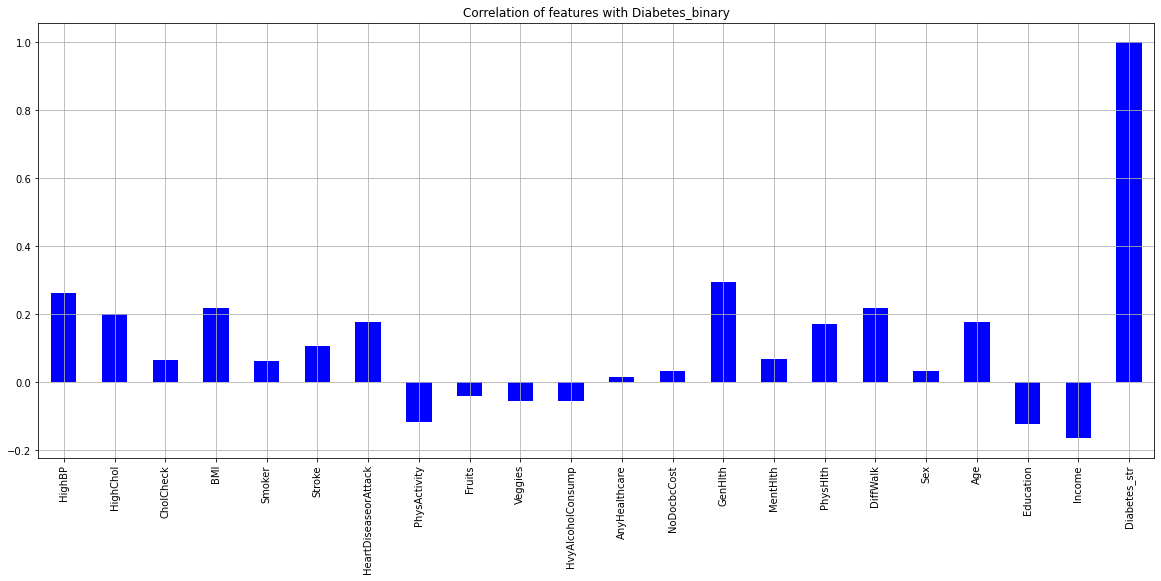

In [ ]:
# use bar graph to see the correlation of the features to diabete binary
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation of features with Diabetes_binary",color="Blue");

In [ ]:
#use chi square to select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,1:]
Y = df.iloc[:,0]

feature_comparison = SelectKBest(score_func=chi2, k=10)
f = feature_comparison.fit(X,Y)

feature_scores = pd.DataFrame(f.scores_)
features = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores_table = pd.concat([features,feature_scores],axis=1)              
f_Scores_table.columns = ['Feature','Score']

f_Scores_table.sort_values(by=['Score'],ascending=False)

Feature          Score
11              PhysHlth  133424.406534
10              MentHlth   21029.632228
2                    BMI   18355.166400
12              DiffWalk   10059.506391
0                 HighBP   10029.013935
9                GenHlth    9938.507776
13                   Age    9276.141199
5   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
15                Income    4829.816361
4                 Stroke    2725.225194
6           PhysActivity     861.887532
7      HvyAlcoholConsump     779.424807
14             Education     756.035496
3                 Smoker     521.978858
8            NoDocbcCost     229.542412

Features with score lower than 100 will be removed. In this case, veggies, fruits, sex, cholcheck and anyhealth care will be removed as features.

In [ ]:
disqualified_features = ["Veggies" , "Fruits" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_str"]

In [ ]:
df.drop(disqualified_features,axis= 1 ,inplace=True)



---



### Logistic Regression

# base model

In [ ]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#seprating to DV and IV
X=df.iloc[:,1:]
Y= df['Diabetes_binary']

In [ ]:
#balancing the dataset for better results
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

X,Y= nm.fit_resample(X,Y)
Y.shape , X.shape

Y.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
#split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53019, 16)
(17673, 16)
(53019,)
(17673,)


In [ ]:
model = LogisticRegression(C=1,solver = 'liblinear', random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [ ]:
#the attribute .classes_ represents the array of distinct values that y takes
model.classes_

array([0., 1.])

In [ ]:
#evaluate the model
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  [-0.86437]
Slope:  [[ 0.11545764  0.04750322  0.11126939  0.23343566  2.26536346  1.27622948
  -1.03454243  1.20610457  2.23375185  0.57828046  2.01993551  1.3602015
   1.88580467 -0.02669662 -0.21273198 -0.43650484]]


In [ ]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
model.score(X_test,y_test)

0.8770440785378827

In [ ]:
confusion_matrix(y_test,model.predict(X_test))

array([[8136,  553],
       [1620, 7364]])

In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      8689
         1.0       0.93      0.82      0.87      8984

    accuracy                           0.88     17673
   macro avg       0.88      0.88      0.88     17673
weighted avg       0.88      0.88      0.88     17673



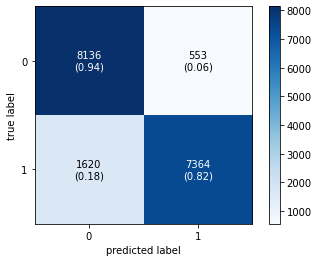

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Base model with SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_base = SGDClassifier(loss = 'log', max_iter = 1000, alpha = 0.0001)
#n_iter = max_iter, alpha = tol
sgd_base.fit(X_train,y_train)
Y_pred = sgd_base.predict(X_test)

print("Coefficients: \n",sgd_base.coef_)
print("Y_intercept: \n",sgd_base.intercept_)
print("Score: \n",sgd_base.score(X_test,y_test))

Coefficients: 
 [[ 0.14078984  0.10060952  0.0924225   0.27361356  2.49848357  1.49482183
  -1.2157154   1.34435061  2.42748655  0.67933682  2.30022241  1.5870528
   2.20638207 -0.04927082 -0.25386429 -0.50892513]]
Y_intercept: 
 [-1.12693383]
Score: 
 0.85718327392067


In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,sgd_base.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87      8689
         1.0       0.99      0.73      0.84      8984

    accuracy                           0.86     17673
   macro avg       0.88      0.86      0.86     17673
weighted avg       0.88      0.86      0.85     17673



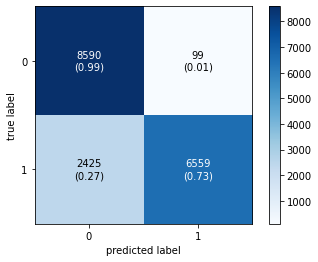

In [ ]:
#confusion matrix
cm2 = confusion_matrix(y_test,sgd_base.predict(X_test))
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Perform the GridSearch (hyper parameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver':('lbfgs','liblinear','saga','sag','newton-cg'),'penalty':('l2','l1','elasticnet'),
              'C':[0.1,0.5,1,2,3,5],
              'max_iter':[100,1000,5000,10000,20000]}
model5 = LogisticRegression(random_state = 0)
clf3=GridSearchCV(model5 , parameters)
clf3.fit(X_train,y_train)

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(clf3.cv_results_['params'])
mean_test_score = pd.DataFrame(clf3.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['C','max_iter','penalty','solver','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

C  max_iter     penalty     solver  mean test score
36   0.1      5000          l1  liblinear          0.87429
51   0.1     10000          l1  liblinear          0.87429
21   0.1      1000          l1  liblinear          0.87429
6    0.1       100          l1  liblinear          0.87429
66   0.1     20000          l1  liblinear          0.87429
..   ...       ...         ...        ...              ...
445  5.0     20000  elasticnet      lbfgs              NaN
446  5.0     20000  elasticnet  liblinear              NaN
447  5.0     20000  elasticnet       saga              NaN
448  5.0     20000  elasticnet        sag              NaN
449  5.0     20000  elasticnet  newton-cg              NaN

[450 rows x 5 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
clf3.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
clf3.best_score_

0.8742903610157378

In [ ]:
clf3.best_estimator_.intercept_

array([-0.55608433])

In [ ]:
clf3.best_estimator_.coef_

array([[ 0.11828306,  0.04568883,  0.10734811,  0.22350049,  2.1309941 ,
         1.25947305, -1.03269323,  1.10325905,  2.04699662,  0.56386707,
         1.96069701,  1.34382807,  1.84250504, -0.03327858, -0.22287713,
        -0.44082347]])

In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,clf3.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      8689
         1.0       0.93      0.82      0.87      8984

    accuracy                           0.88     17673
   macro avg       0.88      0.88      0.88     17673
weighted avg       0.88      0.88      0.88     17673



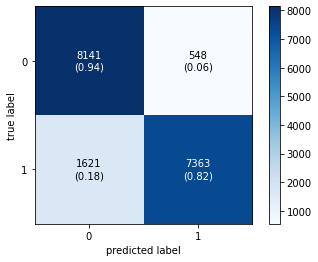

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm3 = confusion_matrix(y_test,clf3.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Performing GridsearchCV for SCGClassifier

In [ ]:

parameters = {'loss':('hinge','log','modified_huber'),'penalty':('l2','l1','elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],
              'max_iter':[1000,5000,10000,20000],}
model3 = SGDClassifier(random_state = 0)
clf=GridSearchCV(model3 , parameters)
clf.fit(X_train,y_train)

In [ ]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(clf.cv_results_['params'])
mean_test_score = pd.DataFrame(clf.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['alpha','loss','max_iter','penalty','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

alpha            loss  max_iter     penalty  mean test score
108  0.001000           hinge      1000          l2         0.873442
111  0.001000           hinge      5000          l2         0.873442
114  0.001000           hinge     10000          l2         0.873442
117  0.001000           hinge     20000          l2         0.873442
88   0.000100             log      5000          l1         0.870480
..        ...             ...       ...         ...              ...
2    0.000001           hinge      1000  elasticnet         0.781702
105  0.000100  modified_huber     20000          l2         0.768085
102  0.000100  modified_huber     10000          l2         0.768085
99   0.000100  modified_huber      5000          l2         0.768085
96   0.000100  modified_huber      1000          l2         0.768085

[216 rows x 5 columns]

In [ ]:
clf.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}

In [ ]:
clf.best_score_

0.8734415428641953

In [ ]:
clf.best_estimator_.intercept_

array([-2.66938452])

In [ ]:
clf.best_estimator_.coef_

array([[-0.01137597,  0.0185608 ,  0.09010967,  0.17872251,  1.38128253,
         0.92324996, -0.69004253,  0.68525264,  1.32380393,  0.50263835,
         1.33068939,  1.06604835,  1.37110402,  0.01766269, -0.02903867,
        -0.31343797]])

In [ ]:
#comprehensive report on the classification 
print(classification_report(y_test,clf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      8689
         1.0       0.97      0.76      0.85      8984

    accuracy                           0.87     17673
   macro avg       0.88      0.87      0.87     17673
weighted avg       0.89      0.87      0.86     17673



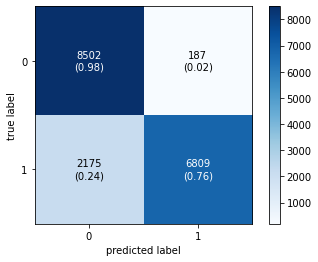

In [ ]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm4 = confusion_matrix(y_test,clf.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
model = LogisticRegression(C=0.1,max_iter= 100, penalty= 'l2', solver= 'newton-cg')
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.8768177445821309

#DNN

Base-Model